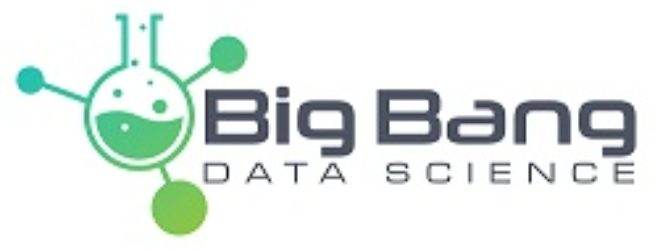

## Predicting Bitcoin Price Using ML

This notebook looks into using various python-base machine learning and data science libraries in an attempt to build a ML model capable of predicting profitability of a movie before it released. steps:

1. problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimenetation

### 1. Problem Definition

Our goal is to build a model to predict the profitability of a movie before it released.

### 2. Data
We will use csv file given on BBDS 13 class

### 3. Evaluation

### 4. Features
Data Dictionary

•	budget – Total cost of the film.
•	country – Country the film was released in.
•	director – Name of the film’s director.
•	genre – The film’s primary genre category.
•	gross – Total gross revenue from the film.
•	name – Name and year of the film.
•	rating – MPAA rating of the film.
•	runtime – Length of the film, in minutes.
•	score – User score on IMDb.
•	star – Lead star of the film.
•	studio – Studio that produced the film.
•	votes – Number of user ratings on IMDb.

### 5. Models

1. Classification Models

### Preparing Tools

1. pandas for data analysis.
2. NumPy for numerical operations.
3. Matplotlib/seaborn for plotting or data visualization.
4. Scikit-Learn for machine learning modelling and evaluation.

In [1]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
sns.set() 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
film = pd.read_csv("box_office_predictions.csv")

### Creating a Target Variable ROI columns

In [3]:
# film['profit'] = (film['gross'] - film['budget'])

In [4]:
film['roi'] = (film['gross'] - film['budget'])/film['budget']*100

In [5]:
film['roi'] = np.where(film['roi'] > 0.95, 1, 0)

In [6]:
film['roi'].value_counts()

1    3920
0    2080
Name: roi, dtype: int64

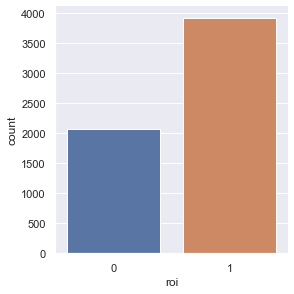

In [7]:
# film['roi'].hist(figsize = (12, 6));
sns.factorplot(x='roi', data=film, kind='count', size=4, aspect=1);

### Data Exploration (exploratory data analysis or EDA)

In [8]:
film.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,1


In [9]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  roi       6000 non-null   int32  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 586.1+ KB


### Factorizing Target Variable ROI

In [10]:
film['roi'] = film.roi.astype('object')
film.dtypes

budget      float64
country      object
director     object
genre        object
gross       float64
name         object
rating       object
runtime       int64
score       float64
star         object
studio       object
votes         int64
roi          object
dtype: object

In [11]:
film.describe(include = "all")

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi
count,6.000000e+03,6000,6000,6000,6.000000e+03,6000,6000,6000.000000,6000.000000,6000,6000,6.000000e+03,6000.0
unique,NaN,52,2549,17,NaN,6000,13,NaN,NaN,2317,1996,NaN,2.0
top,NaN,USA,Woody Allen,Comedy,NaN,Chameleon Street (1989),R,NaN,NaN,Nicolas Cage,Universal Pictures,NaN,1.0
freq,NaN,4281,29,1818,NaN,1,3009,NaN,NaN,38,269,NaN,3920.0
mean,2.469918e+07,NaN,NaN,NaN,3.341635e+07,NaN,NaN,106.587000,6.386383,NaN,NaN,7.188537e+04,NaN
std,3.721710e+07,NaN,NaN,NaN,5.735205e+07,NaN,NaN,18.026885,0.994921,NaN,NaN,1.308033e+05,NaN
min,0.000000e+00,NaN,NaN,NaN,4.410000e+02,NaN,NaN,50.000000,1.500000,NaN,NaN,2.700000e+01,NaN
25%,0.000000e+00,NaN,NaN,NaN,1.527796e+06,NaN,NaN,95.000000,5.800000,NaN,NaN,7.791750e+03,NaN
50%,1.100000e+07,NaN,NaN,NaN,1.229897e+07,NaN,NaN,102.000000,6.500000,NaN,NaN,2.660150e+04,NaN
75%,3.262500e+07,NaN,NaN,NaN,4.007256e+07,NaN,NaN,115.000000,7.100000,NaN,NaN,7.677475e+04,NaN


In [12]:
film.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
country,6000,52,USA,4281
director,6000,2549,Woody Allen,29
genre,6000,17,Comedy,1818
name,6000,6000,Chameleon Street (1989),1
rating,6000,13,R,3009
star,6000,2317,Nicolas Cage,38
studio,6000,1996,Universal Pictures,269
roi,6000,2,1,3920


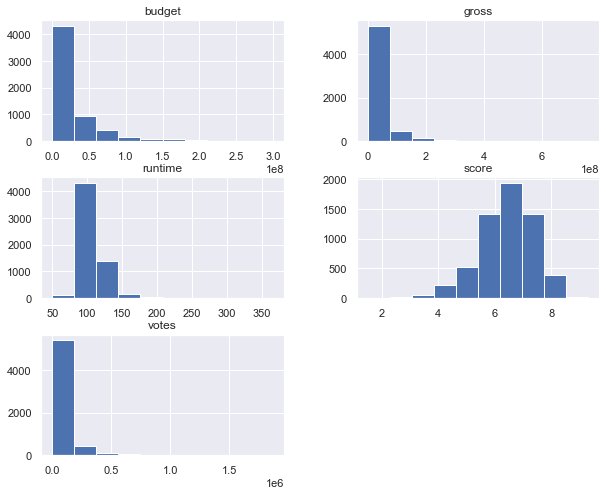

In [13]:
# Distribution 
features = ['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
            'runtime', 'score', 'star', 'studio', 'votes']

film[features].hist(figsize=(10, 8));

In [14]:
film.skew(axis = 0, skipna = True)

budget     2.586509
gross      3.901426
runtime    2.407584
score     -0.620615
votes      4.831332
roi       -0.644543
dtype: float64

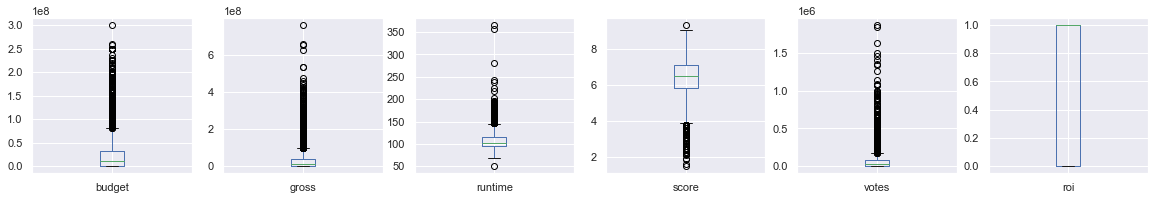

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
film.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()


### Handling Missing 0 Data in Budget (Impute with Median)

In [16]:
film['budget'].value_counts()

0.0           1911
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
9600000.0        1
6428966.0        1
300000.0         1
34200000.0       1
17080000.0       1
Name: budget, Length: 338, dtype: int64

In [17]:
# Impute missing numerical data with median '

median_budget = film.budget.median()
median_budget

11000000.0

In [18]:
film['budget'] = film['budget'].replace({0: 11000000})

In [19]:
film['budget'].value_counts()

11000000.0     1966
20000000.0      166
30000000.0      164
25000000.0      160
15000000.0      152
               ... 
58800000.0        1
35200000.0        1
210000000.0       1
6600000.0         1
17080000.0        1
Name: budget, Length: 337, dtype: int64

#### How does ROI influenced by the IMDB score and Votes of any movie?

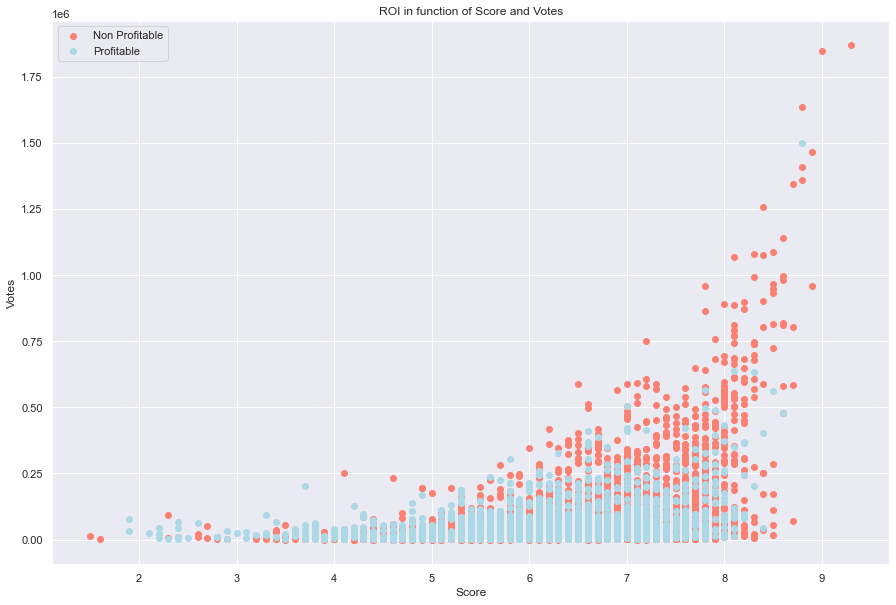

In [20]:
# Create another figure
plt.figure(figsize=(15,10))

# Start with Not Profitable film examples
plt.scatter(film.score[film.roi==1], 
            film.votes[film.roi==1], 
            c="salmon") # define it as a scatter figure

# Now for Profitable film examples, we want them on the same plot, so we call plt again
plt.scatter(film.score[film.roi==0], 
            film.votes[film.roi==0], 
            c="lightblue") # axis always come as (x, y)


# Add some helpful info
plt.title("ROI in function of Score and Votes")
plt.xlabel("Score")
plt.legend(["Non Profitable", "Profitable"])
plt.ylabel("Votes");

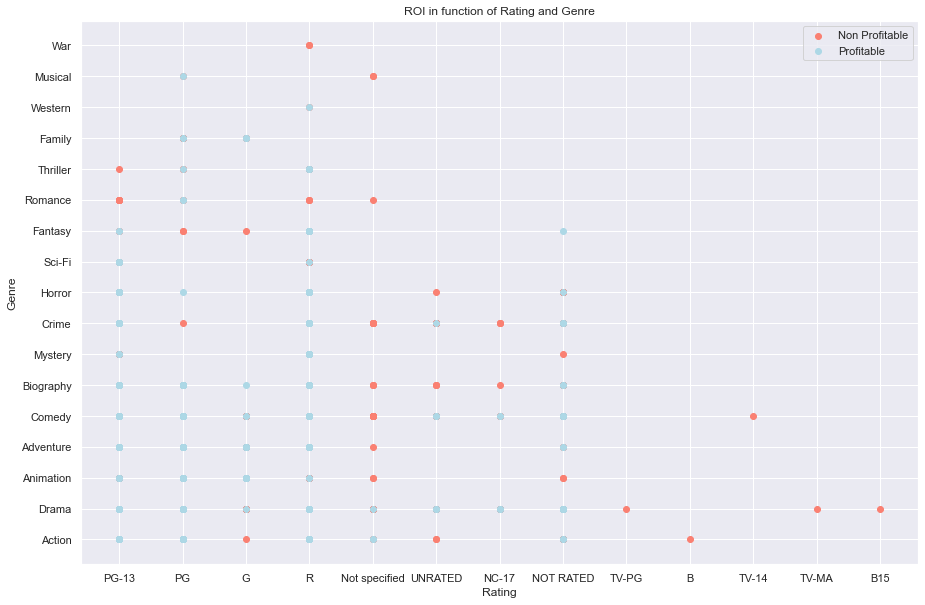

In [21]:
# Create another figure
plt.figure(figsize=(15,10))

# Start with Not Profitable film examples
plt.scatter(film.rating[film.roi==1], 
            film.genre[film.roi==1], 
            c="salmon") # define it as a scatter figure

# Now for Profitable film examples, we want them on the same plot, so we call plt again
plt.scatter(film.rating[film.roi==0], 
            film.genre[film.roi==0], 
            c="lightblue") # axis always come as (x, y)


# Add some helpful info
plt.title("ROI in function of Rating and Genre")
plt.xlabel("Rating")
plt.legend(["Non Profitable", "Profitable"])
plt.ylabel("Genre");

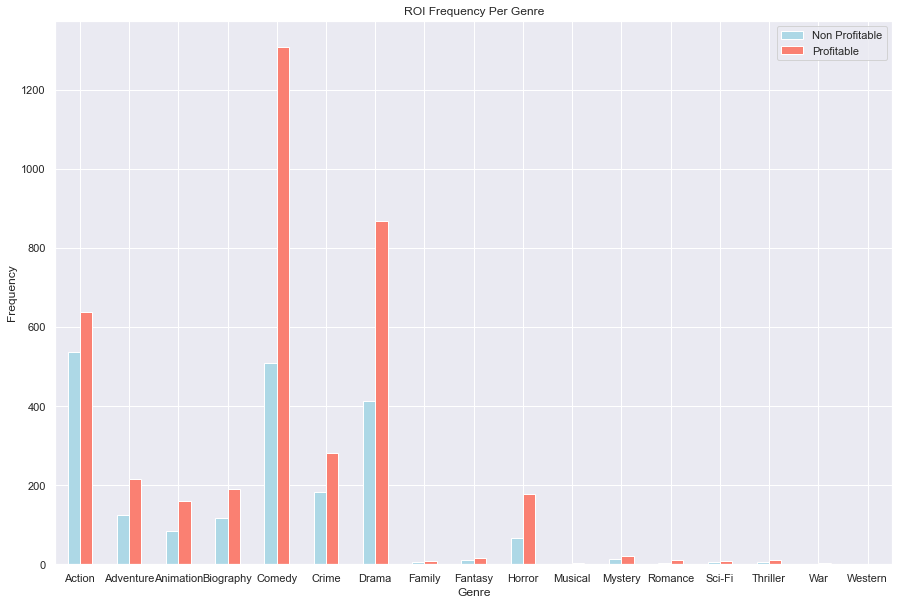

In [22]:
# Create a new crosstab and base plot
pd.crosstab(film.genre, film.roi).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("ROI Frequency Per Genre")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.legend(["Non Profitable", "Profitable"])
plt.xticks(rotation = 0);

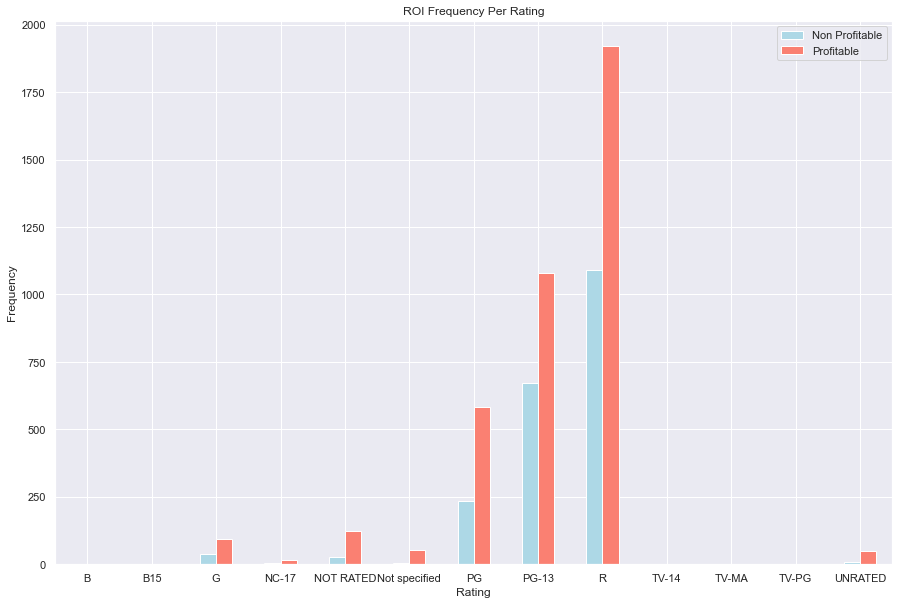

In [23]:
# Create a new crosstab and base plot
pd.crosstab(film.rating, film.roi).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("ROI Frequency Per Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend(["Non Profitable", "Profitable"])
plt.xticks(rotation = 0);

### Removing outliers from the budget column

In [24]:
# film = film.loc[film['budget']>0]

In [25]:
# film['budget'].describe()

In [26]:
# film['budget'].hist();

In [27]:
# plt.rcParams['figure.figsize'] = 20,20  # control plot size
# film['budget'].plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
# plt.show()

### Correlation 

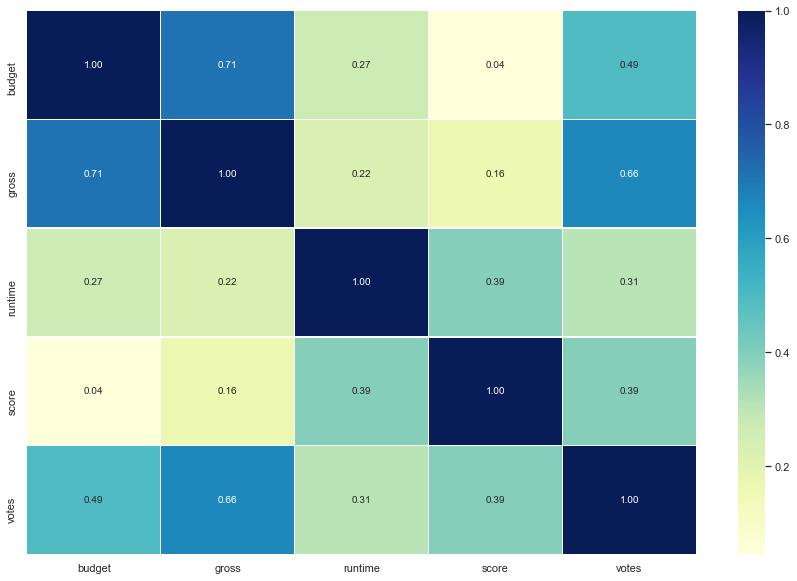

In [28]:
# Correlation heatmap of the numberic variables

corr_matrix = film.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### Dealing with Categorical data

In [29]:
film_dtypes = film.dtypes == 'object'

In [30]:
type(film_dtypes)

pandas.core.series.Series

In [31]:
obj_cols = []
for i, feature in enumerate(film_dtypes):
    if feature:
        obj_cols.append(film_dtypes.index[i])

In [32]:
obj_cols

['country', 'director', 'genre', 'name', 'rating', 'star', 'studio', 'roi']

In [33]:
obj_col_features = ['country', 'director', 'genre', 'name', 'rating', 'star', 'studio']

In [34]:
objs_film = film.loc[:, obj_col_features]

In [35]:
# objs_film = film.loc[:, obj_cols]

In [36]:
objs_film.head()

,country,director,genre,name,rating,star,studio
0,UK,James Cameron,Action,Avatar (2009),PG-13,Sam Worthington,Twentieth Century Fox Film Corporation
1,USA,James Cameron,Drama,Titanic (1997),PG-13,Leonardo DiCaprio,Twentieth Century Fox Film Corporation
2,USA,Colin Trevorrow,Action,Jurassic World (2015),PG-13,Chris Pratt,Universal Pictures
3,USA,Joss Whedon,Action,The Avengers (2012),PG-13,Robert Downey Jr.,Marvel Studios
4,USA,Christopher Nolan,Action,The Dark Knight (2008),PG-13,Christian Bale,Warner Bros.


In [37]:
to_delete = ['director', 'name', 'star', 'studio']

In [38]:
objs_film = objs_film.drop(to_delete, axis = 1 )

In [39]:
objs_film.head()

,country,genre,rating
0,UK,Action,PG-13
1,USA,Drama,PG-13
2,USA,Action,PG-13
3,USA,Action,PG-13
4,USA,Action,PG-13


### Factorizing country, Genre & Rating into lower levels

In [40]:
objs_film['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
New Zealand                         17
Sweden                              17
Belgium                             15
Mexico                              13
Netherlands                         12
Russia                              10
Iran                                10
Argentina                           10
Czech Republic                       8
Norway                               8
Taiwan                   

In [41]:
objs_film.loc[objs_film['country'] != 'USA', ['country']] = 'non-USA'

In [42]:
objs_film['country'].unique()

array(['non-USA', 'USA'], dtype=object)

In [43]:
objs_film['country'].value_counts()

USA        4281
non-USA    1719
Name: country, dtype: int64

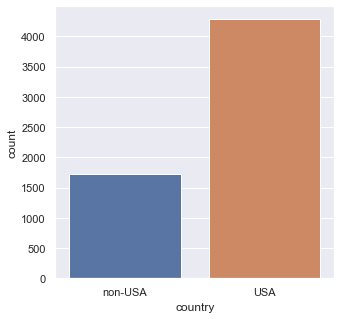

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(x='country', data=objs_film);

In [45]:
CrosstabResult = pd.crosstab(index = film['country'], columns = film['roi'])
print(CrosstabResult)

roi                                0     1
country                                   
Argentina                          2     8
Australia                         14    57
Austria                            1     3
Bahamas                            0     1
Belgium                            2    13
Brazil                             1     4
Canada                            47    79
Chile                              1     2
China                              8    15
Colombia                           1     1
Czech Republic                     5     3
Denmark                            8    23
Federal Republic of Yugoslavia     0     1
Finland                            0     3
France                            73   176
Germany                           52    67
Greece                             0     4
Hong Kong                         11    27
Hungary                            1     6
Iceland                            0     1
India                              9    27
Indonesia  

In [46]:
CrosstabResult = pd.crosstab(index = objs_film['country'], columns = film['roi'])
print(CrosstabResult)

roi         0     1
country            
USA      1542  2739
non-USA   538  1181


In [47]:
objs_film['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-MA               1
TV-14               1
B                   1
B15                 1
TV-PG               1
Name: rating, dtype: int64

In [48]:
objs_film['rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Not specified', 'NC-17', 'UNRATED',
       'NOT RATED', 'TV-PG', 'B', 'TV-14', 'TV-MA', 'B15'], dtype=object)

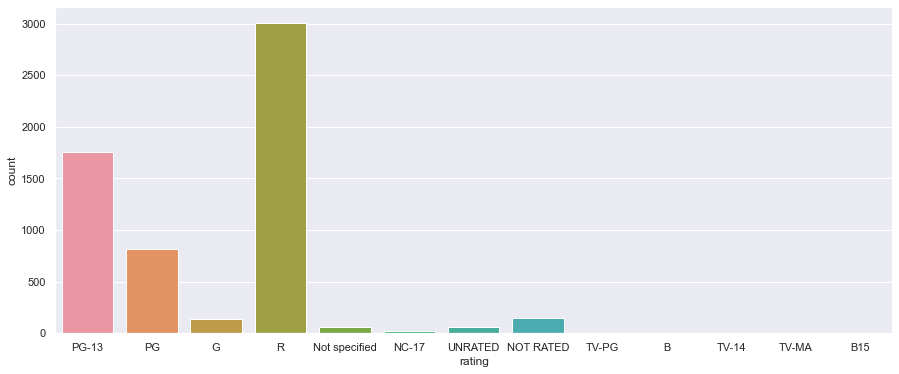

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating', data=objs_film);

In [50]:
objs_film = objs_film.replace(to_replace =["PG-13","PG","G","TV-PG"] ,  value ="PG")
objs_film = objs_film.replace(to_replace =["Not specified","UNRATED","NOT RATED","B", "TV-14","B15"] ,  value ="NR")
objs_film = objs_film.replace(to_replace =["R","TV-MA","NC-17"] ,  value ="R")

In [51]:
# objs_film['rating'] = objs_film['rating'].replace({'Not specified': 'NOT RATED',
                                                    # 'NC-17': 'NOT RATED',
                                                    # 'UNRATED': 'NOT RATED',
                                                   #  'TV-PG': 'NOT RATED',
                                                   #  'B15': 'NOT RATED',
                                                   #  'TV-MA': 'NOT RATED',
                                                   #  'G': 'NOT RATED',
                                                   #  'TV-14': 'NOT RATED',
                                                   #  'B': 'NOT RATED'})

In [52]:
objs_film['rating'].unique()

array(['PG', 'R', 'NR'], dtype=object)

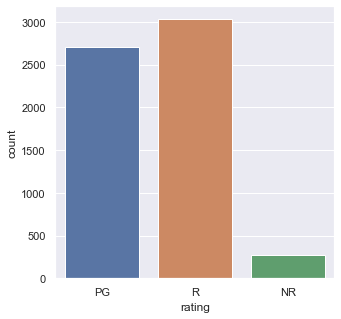

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(x='rating', data=objs_film);

In [54]:
objs_film['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
War             2
Western         2
Name: genre, dtype: int64

In [55]:
objs_film['genre'].unique()

array(['Action', 'Drama', 'Animation', 'Adventure', 'Comedy', 'Biography',
       'Mystery', 'Crime', 'Horror', 'Sci-Fi', 'Fantasy', 'Romance',
       'Thriller', 'Family', 'Western', 'Musical', 'War'], dtype=object)

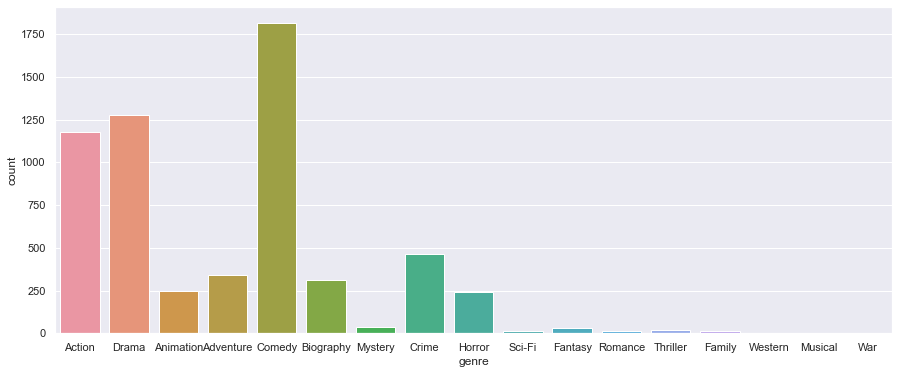

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x='genre', data=objs_film);

In [57]:
objs_film = objs_film.replace(to_replace =["Crime","Adventure","Biography","Animation","Horror","Mystery",
                                                   "Fantasy","Thriller","Romance","Sci-Fi","Family","Musical",
                                                   "War","Western"], value ="Others")

In [58]:
# objs_film['genre'] = objs_film['genre'].replace({'Mystery' : 'Other',
                                                   #  'Fantasy': 'Other',
                                                   #  'Thriller': 'Other',
                                                   #  'Romance': 'Other',
                                                   #  'Sci-Fi': 'Other',
                                                   #  'Family': 'Other',
                                                   #  'Musical': 'Other',
                                                   #  'War' : 'Other',
                                                   # 'Western' : 'Other'})

In [59]:
objs_film['genre'].unique()

array(['Action', 'Drama', 'Others', 'Comedy'], dtype=object)

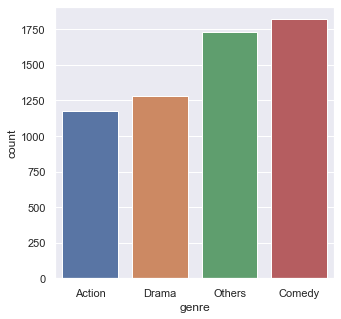

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='genre', data=objs_film);

### Transforming Categorical Data into Dummies

In [61]:
to_be_dummied = ['country', 'genre', 'rating']

In [62]:
objs_dummied = pd.get_dummies(objs_film[to_be_dummied], drop_first=True) 
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables.

In [63]:
objs_dummied.head()

,country_non-USA,genre_Comedy,genre_Drama,genre_Others,rating_PG,rating_R
0,1,0,0,0,1,0
1,0,0,1,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [64]:
objs_dummied.shape

(6000, 6)

In [65]:
objs_dummied ['roi'] = film['roi']

In [66]:
objs_dummied.columns

Index(['country_non-USA', 'genre_Comedy', 'genre_Drama', 'genre_Others',
       'rating_PG', 'rating_R', 'roi'],
      dtype='object')

In [67]:
objs_dummied.head()

,country_non-USA,genre_Comedy,genre_Drama,genre_Others,rating_PG,rating_R,roi
0,1,0,0,0,1,0,1
1,0,0,1,0,1,0,1
2,0,0,0,0,1,0,1
3,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1


### Numerical Data

In [68]:
cols_types = film.dtypes != 'object'
inds = cols_types.index
numeric_cols = []
for i, col in enumerate(cols_types):
    if col:
        numeric_cols.append(inds[i])

In [69]:
numeric_cols

['budget', 'gross', 'runtime', 'score', 'votes']

In [70]:
numeric_cols = film.loc[:, numeric_cols]

In [71]:
numeric_cols.head()

,budget,gross,runtime,score,votes
0,237000000.0,760507625.0,162,7.8,958400
1,200000000.0,658672302.0,194,7.8,865551
2,150000000.0,652270625.0,124,7.0,470625
3,220000000.0,623357910.0,143,8.1,1069292
4,185000000.0,534858444.0,152,9.0,1845853


### Concatenate Categorical & Numerical Data into Clean One file

In [72]:
clean_film = pd.concat([numeric_cols, objs_dummied], axis = 1, sort = False)

In [73]:
clean_film.head()

,budget,gross,runtime,score,votes,country_non-USA,genre_Comedy,genre_Drama,genre_Others,rating_PG,rating_R,roi
0,237000000.0,760507625.0,162,7.8,958400,1,0,0,0,1,0,1
1,200000000.0,658672302.0,194,7.8,865551,0,0,1,0,1,0,1
2,150000000.0,652270625.0,124,7.0,470625,0,0,0,0,1,0,1
3,220000000.0,623357910.0,143,8.1,1069292,0,0,0,0,1,0,1
4,185000000.0,534858444.0,152,9.0,1845853,0,0,0,0,1,0,1


In [74]:
clean_film.shape

(6000, 12)

### Feature Selection using ML

In [75]:
X = clean_film.drop(['roi'], axis = 1)
y = clean_film.roi

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X, y,
                                               test_size = .2,
                                               random_state=42)


[19:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.3919033  0.40952787 0.01734177 0.0259871  0.02208429 0.02413661
 0.01982233 0.01413602 0.02602348 0.02234247 0.02669472]


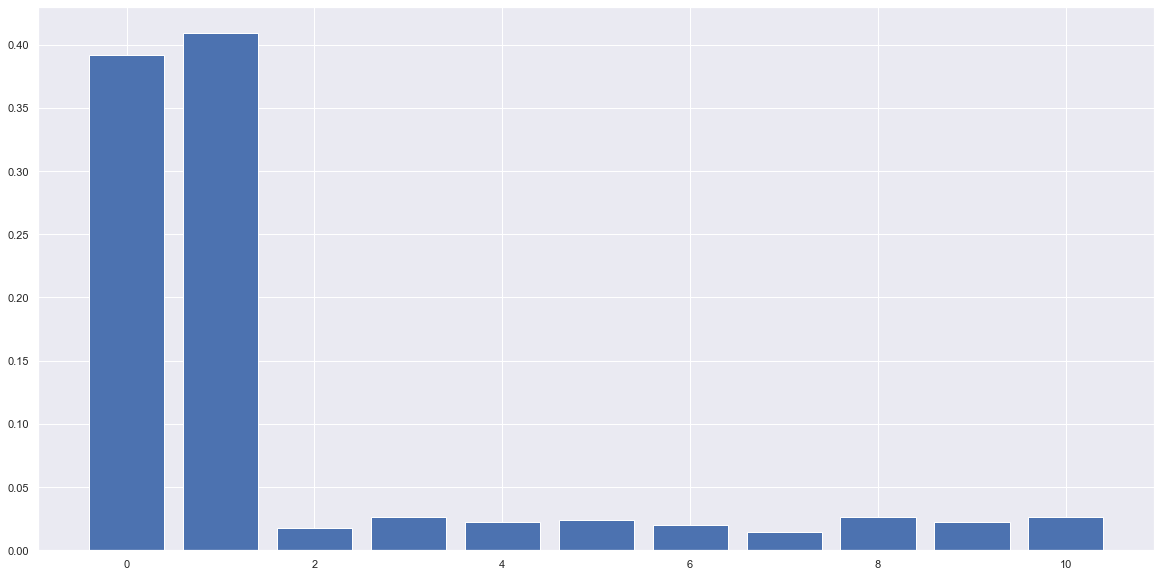

In [77]:
# Bar Plot feature importances
!pip install xgboost

from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [78]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

,Importance Coef,Features
1,0.409528,gross
0,0.391903,budget
10,0.026695,rating_R
8,0.026023,genre_Others
3,0.025987,score
5,0.024137,country_non-USA
9,0.022342,rating_PG
4,0.022084,votes
6,0.019822,genre_Comedy
2,0.017342,runtime


In [79]:
clean_film.columns

Index(['budget', 'gross', 'runtime', 'score', 'votes', 'country_non-USA',
       'genre_Comedy', 'genre_Drama', 'genre_Others', 'rating_PG', 'rating_R',
       'roi'],
      dtype='object')

In [80]:
to_delete = ['country_non-USA', 'genre_Comedy', 'genre_Drama', 'genre_Others', 'rating_PG', 'rating_R']

In [81]:
clean_film = clean_film.drop(to_delete, axis = 1 )

In [82]:
clean_film.head()

,budget,gross,runtime,score,votes,roi
0,237000000.0,760507625.0,162,7.8,958400,1
1,200000000.0,658672302.0,194,7.8,865551,1
2,150000000.0,652270625.0,124,7.0,470625,1
3,220000000.0,623357910.0,143,8.1,1069292,1
4,185000000.0,534858444.0,152,9.0,1845853,1
